# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import csv
import time
import unicodedata
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

656

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
#Test out the entire code with a test dataset
#Save the original list of 624 cities in another variable, original_cities
#original_cities = cities

#Save test cities in cities
#cities = ["Boston","New York","Philadelphia","Whatever","Los Angeles", "Chicago","New Delhi","Paris"]


In [27]:
#Perform weather check on each city in the cities list
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
main_json = list()
units = "imperial"
# Define batch_size
set_size = 50
# Find the number of sets
overflow = len(cities) % set_size
num_sets = int(len(cities)/set_size)
if overflow>0:
    num_sets+=1

for s in range(num_sets):
    record = 1
    for city in cities[s*set_size:s*set_size+set_size]:
        # Build query URL
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        #{'cod': '404', 'message': 'city not found'}
        if weather_json["cod"]!= '404':
            main_json.append(weather_json)
            print("Processing Record "+ str(record) +" of Set " + str(s+1) + " | "+ city)
            record+=1
        else:
            print("City not found. Skipping...")
    time.sleep(3)

Processing Record 1 of Set 1 | graham
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | sisimiut
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | barahan
Processing Record 9 of Set 1 | hermanus
City not found. Skipping...
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | tuatapere
Processing Record 12 of Set 1 | constitucion
Processing Record 13 of Set 1 | takapau
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | hasaki
Processing Record 17 of Set 1 | husavik
Processing Record 18 of Set 1 | svetlaya
Processing Record 19 of Set 1 | carballo
Processing Record 20 of Set 1 | dunkirk
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | khatanga
Processing Record 23 of Set 1 | puga
Processing Record 24 of Set 1 | esperance
Proces

Processing Record 8 of Set 5 | rafai
City not found. Skipping...
Processing Record 9 of Set 5 | cooma
City not found. Skipping...
Processing Record 10 of Set 5 | casas grandes
Processing Record 11 of Set 5 | zhangzhou
City not found. Skipping...
Processing Record 12 of Set 5 | port augusta
Processing Record 13 of Set 5 | ustka
Processing Record 14 of Set 5 | kruisfontein
Processing Record 15 of Set 5 | tucuman
Processing Record 16 of Set 5 | dobryanka
Processing Record 17 of Set 5 | mikuni
Processing Record 18 of Set 5 | nuuk
Processing Record 19 of Set 5 | chauk
Processing Record 20 of Set 5 | umuarama
City not found. Skipping...
Processing Record 21 of Set 5 | galveston
Processing Record 22 of Set 5 | killorglin
Processing Record 23 of Set 5 | longyearbyen
Processing Record 24 of Set 5 | beringovskiy
Processing Record 25 of Set 5 | xuddur
Processing Record 26 of Set 5 | faanui
Processing Record 27 of Set 5 | sorland
City not found. Skipping...
Processing Record 28 of Set 5 | cidreira

Processing Record 13 of Set 9 | atar
Processing Record 14 of Set 9 | ikwiriri
Processing Record 15 of Set 9 | martvili
Processing Record 16 of Set 9 | koubia
Processing Record 17 of Set 9 | mae sai
Processing Record 18 of Set 9 | beira
Processing Record 19 of Set 9 | chimbote
Processing Record 20 of Set 9 | broken hill
Processing Record 21 of Set 9 | yerbogachen
Processing Record 22 of Set 9 | chinsali
Processing Record 23 of Set 9 | carutapera
Processing Record 24 of Set 9 | presidencia roque saenz pena
Processing Record 25 of Set 9 | fairbanks
City not found. Skipping...
Processing Record 26 of Set 9 | palmer
Processing Record 27 of Set 9 | flinders
Processing Record 28 of Set 9 | marshall
Processing Record 29 of Set 9 | tigil
Processing Record 30 of Set 9 | saldanha
Processing Record 31 of Set 9 | moose factory
Processing Record 32 of Set 9 | jiuquan
Processing Record 33 of Set 9 | dongsheng
Processing Record 34 of Set 9 | kendari
Processing Record 35 of Set 9 | aras
Processing Reco

Processing Record 17 of Set 13 | sapouy
Processing Record 18 of Set 13 | chengzihe
Processing Record 19 of Set 13 | makushino
Processing Record 20 of Set 13 | gemena
Processing Record 21 of Set 13 | dawson creek
Processing Record 22 of Set 13 | alice springs
Processing Record 23 of Set 13 | opuwo
Processing Record 24 of Set 13 | comodoro rivadavia
Processing Record 25 of Set 13 | helong
Processing Record 26 of Set 13 | zyryanka
Processing Record 27 of Set 13 | lumut
Processing Record 28 of Set 13 | ronne
Processing Record 29 of Set 13 | mandalgovi
Processing Record 30 of Set 13 | xining
Processing Record 31 of Set 13 | acarau
Processing Record 32 of Set 13 | utrecht
Processing Record 33 of Set 13 | hovd
Processing Record 34 of Set 13 | shache
Processing Record 35 of Set 13 | singapore
Processing Record 36 of Set 13 | salalah
Processing Record 37 of Set 13 | lucapa
Processing Record 38 of Set 13 | badou
Processing Record 39 of Set 13 | tazovskiy
Processing Record 40 of Set 13 | balikpap

In [28]:
len(main_json)

602

In [29]:
main_json[0]

{'coord': {'lon': -122.29, 'lat': 47.05},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 60.1,
  'feels_like': 58.14,
  'temp_min': 59,
  'temp_max': 61,
  'pressure': 1019,
  'humidity': 93},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 220, 'gust': 19.46},
 'clouds': {'all': 90},
 'dt': 1602896929,
 'sys': {'type': 1,
  'id': 5366,
  'country': 'US',
  'sunrise': 1602858562,
  'sunset': 1602897566},
 'timezone': -25200,
 'id': 5795906,
 'name': 'Graham',
 'cod': 200}

In [42]:
main_json[0]['name'].encode("utf-8")

b'Graham'

## Convert Raw Data to DataFrame
* Save as csv

In [58]:
with open('weather.csv', 'w',newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["City","Lat","Lng","MaxTemp","Humidity","Cloudiness","Wind Speed","Country","Date"])
    for city in main_json:
        name = unicodedata.normalize('NFKD',city["name"]).encode('utf-8','ignore')        
        lat = city["coord"]["lat"]
        lng = city["coord"]["lon"]
        max_temp = city["main"]["temp_max"]
        humidity = city["main"]["humidity"]
        cloudiness = city["clouds"]["all"]
        wind_speed = city["wind"]["speed"]
        country = city["sys"]["country"]
        date = city["dt"]
        writer.writerow([name,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date])

In [63]:
weather_df = pd.read_csv("weather.csv")

In [15]:
#ANSWER DO NOT RUN --------------------------

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [75]:
datevar = weather_df["Date"].astype(int)
datevar[0]

1602896929

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

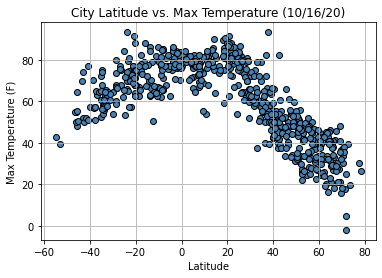

In [93]:
# Convert date to MM/DD/YY format
for i in range(len(datevar)):
    weather_df["Date"] = datetime.datetime.fromtimestamp(datevar[i]).strftime('%m/%d/%y')
plt.title("City Latitude vs. Max Temperature ("+weather_df["Date"][0]+")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.scatter(weather_df['Lat'],weather_df['MaxTemp'],c='steelblue',edgecolor='black')
plt.show()

### Latitude vs. Humidity Plot

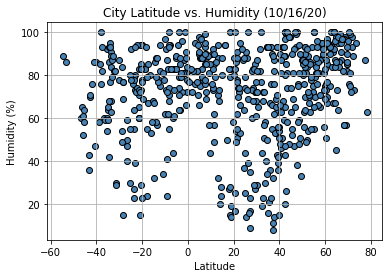

In [95]:
plt.title("City Latitude vs. Humidity ("+ weather_df["Date"][0]+")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.scatter(weather_df['Lat'],weather_df['Humidity'],c='steelblue',edgecolor='black')
plt.show()

### Latitude vs. Cloudiness Plot

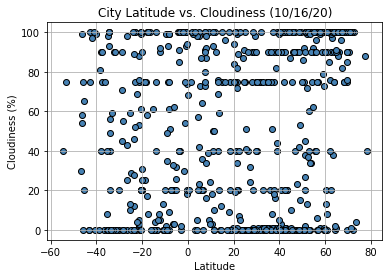

In [96]:
plt.title("City Latitude vs. Cloudiness ("+ weather_df["Date"][0]+")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],c='steelblue',edgecolor='black')
plt.show()

### Latitude vs. Wind Speed Plot

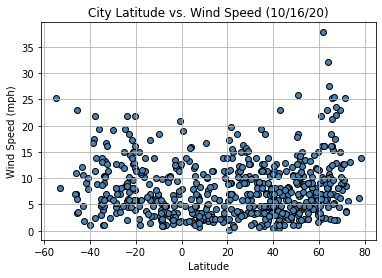

In [97]:
plt.title("City Latitude vs. Wind Speed ("+ weather_df["Date"][0]+")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],c='steelblue',edgecolor='black')
plt.show()

## Linear Regression

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [101]:
#Split weather_df into northern and southern hemisphere
north_weather_df = weather_df[weather_df["Lat"]>=0]
south_weather_df = weather_df[weather_df["Lat"]<0]

The r-squared is: 0.761706643393329


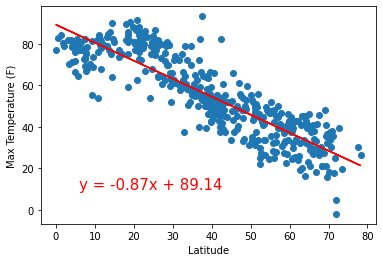

In [102]:
# Print out the r-squared value along with the plot.
x_values = north_weather_df['Lat']
y_values = north_weather_df['MaxTemp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.45615534844448297


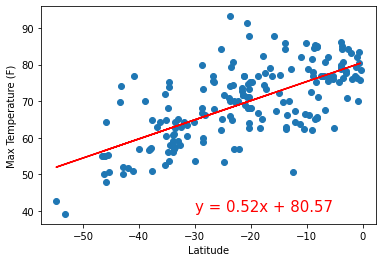

In [104]:
# Print out the r-squared value along with the plot.
x_values = south_weather_df['Lat']
y_values = south_weather_df['MaxTemp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03947341907129046


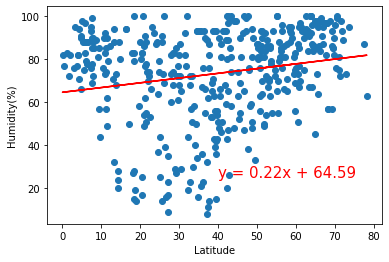

In [107]:
# Print out the r-squared value along with the plot.
x_values = north_weather_df['Lat']
y_values = north_weather_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03011168806136785


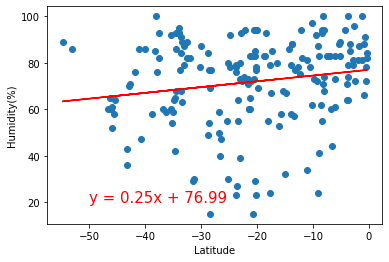

In [113]:
# Print out the r-squared value along with the plot.
x_values = south_weather_df['Lat']
y_values = south_weather_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05097288330135407


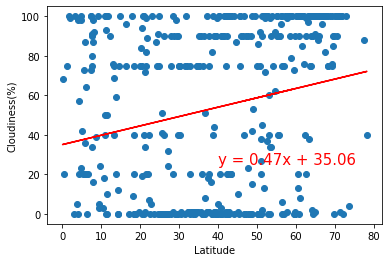

In [114]:
# Print out the r-squared value along with the plot.
x_values = north_weather_df['Lat']
y_values = north_weather_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0023644287018101777


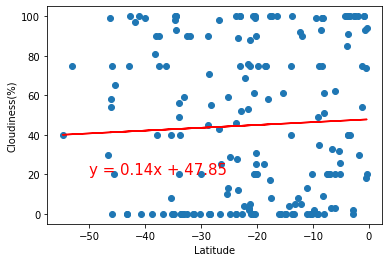

In [116]:
# Print out the r-squared value along with the plot.
x_values = south_weather_df['Lat']
y_values = south_weather_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


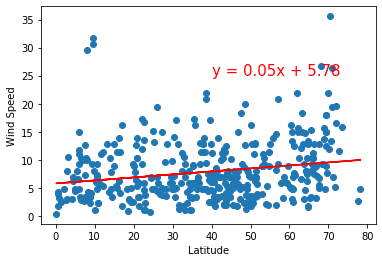

In [31]:
#ANSWER DO NOT RUN

The r-squared is: 0.05891713417791542


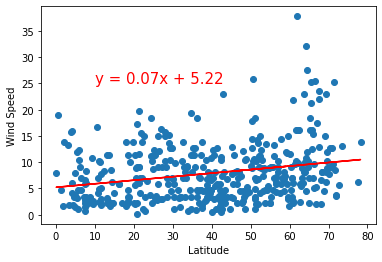

In [118]:
# Print out the r-squared value along with the plot.
x_values = north_weather_df['Lat']
y_values = north_weather_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05583629977561941


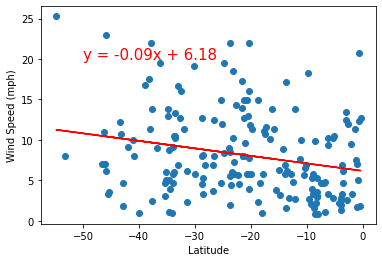

In [120]:
# Print out the r-squared value along with the plot.
x_values = south_weather_df['Lat']
y_values = south_weather_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()